In [2]:
import os
import librosa
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("🚀 Script started...")

# Step 1: Extract the ZIP file
zip_path = r"C:\Users\J.TINCKY PRIYA\Downloads\Data (1).zip"
extract_path = r"C:\Users\J.TINCKY PRIYA\Downloads\Data (1)"

if not os.path.exists(extract_path):
    print("📦 Extracting ZIP...")
    os.makedirs(extract_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ ZIP extracted.")
else:
    print("✅ ZIP already extracted.")

# Step 2: Prepare dataset path
Dataset_path = os.path.join(extract_path, "genres_original")
print("📁 Dataset path:", Dataset_path)

# Step 3: Genres
genres = ['blues', 'classical', 'country', 'disco', 'hiphop',
          'jazz', 'metal', 'pop', 'reggae', 'rock']

X = []
y = []

print("\n🎧 Starting MFCC extraction...")

for label, genre in enumerate(genres):
    genre_folder = os.path.join(Dataset_path, genre)
    
    if not os.path.exists(genre_folder):
        print(f"⚠️ Folder not found: {genre_folder}")
        continue

    print(f"🔍 Processing genre: {genre}")

    for file in os.listdir(genre_folder):
        if file.endswith('.wav'):
            file_path = os.path.join(genre_folder, file)
            try:
                y_audio, sr = librosa.load(file_path, duration=30)
                mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=40)
                mfcc_scaled = np.mean(mfcc.T, axis=0)

                X.append(mfcc_scaled)
                y.append(label)

            except Exception as e:
                print(f"❌ Error processing {file_path}: {e}")

print("✅ Finished processing all files.")
print("📊 Total samples extracted:", len(X))

# Step 4: Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("📈 Feature shape:", X.shape)
print("📉 Label shape:", y.shape)


🚀 Script started...
✅ ZIP already extracted.
📁 Dataset path: C:\Users\J.TINCKY PRIYA\Downloads\Data (1)\genres_original

🎧 Starting MFCC extraction...
🔍 Processing genre: blues
🔍 Processing genre: classical
🔍 Processing genre: country
🔍 Processing genre: disco
🔍 Processing genre: hiphop
🔍 Processing genre: jazz


C:\Users\J.TINCKY PRIYA\AppData\Local\Temp\ipykernel_3460\3691245476.py:50: UserWarning: PySoundFile failed. Trying audioread instead.
  y_audio, sr = librosa.load(file_path, duration=30)


❌ Error processing C:\Users\J.TINCKY PRIYA\Downloads\Data (1)\genres_original\jazz\jazz.00054.wav: 
🔍 Processing genre: metal
🔍 Processing genre: pop
🔍 Processing genre: reggae
🔍 Processing genre: rock
✅ Finished processing all files.
📊 Total samples extracted: 999
📈 Feature shape: (999, 40)
📉 Label shape: (999,)


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assume X and y are already prepared
# If your X is shape (1000, 40), reshape for CNN input:
X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, 40, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=10)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\J.TINCKY PRIYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\J.TINCKY PRIYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\J.TINCKY PRIYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
X = X.reshape(X.shape[0], X.shape[1], 1)
y = to_categorical(y, num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # 10 genres
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
loss, acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {acc * 100:.2f}%")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
model.save("genre_cnn_model.h5")
print("✅ Model saved as genre_cnn_model.h5")

c:\Users\J.TINCKY PRIYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10), output.shape=(None, 10)

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# --------------------------
# STEP 1: Load or prepare your data
# --------------------------

# X should be your MFCC features of shape (samples, 40)
# y should be integer labels (0 to 9)

# Replace this with your real X and y
# For demo: dummy values (remove this when using real data)
# X = np.random.rand(1000, 40)
# y = np.random.randint(0, 10, 1000)

# Ensure y is integer before one-hot encoding
if len(y.shape) != 2:
    y = to_categorical(y, num_classes=10)

# Reshape X for CNN: (samples, 40, 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# STEP 2: Build CNN model
# --------------------------
model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # 10 genres

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# --------------------------
# STEP 3: Train the model
# --------------------------
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# --------------------------
# STEP 4: Evaluate the model
# --------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

# --------------------------
# STEP 5: Plot accuracy & loss
# --------------------------
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------
# STEP 6: Save the model
# --------------------------
model.save("genre_cnn_model.h5")
print("✅ Model saved as 'genre_cnn_model.h5'")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10, 10), output.shape=(None, 10)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# -----------------------------------
# ✅ Step 1: Assume you have X and y
# -----------------------------------
# X must be of shape (samples, 40) — MFCC features
# y must be a 1D array of integers (0–9)

# Replace with your real X and y if already loaded
# Example dummy data if testing:
# X = np.random.rand(1000, 40)
# y = np.random.randint(0, 10, 1000)

# Make sure X is a NumPy array
X = np.array(X)
y = np.array(y)

# -----------------------------------
# ✅ Step 2: Clean and encode y
# -----------------------------------
# If y is already one-hot encoded (3D or 4D), reverse it
if len(y.shape) > 1:
    y = np.argmax(y, axis=-1)

# Now one-hot encode properly
y = to_categorical(y, num_classes=10)
print("✅ Final y shape:", y.shape)  # should be (samples, 10)

# -----------------------------------
# ✅ Step 3: Reshape X for CNN
# -----------------------------------
if len(X.shape) == 2:
    X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, 40, 1)
print("✅ Final X shape:", X.shape)

# -----------------------------------
# ✅ Step 4: Split the dataset
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# -----------------------------------
# ✅ Step 5: Build the CNN model
# -----------------------------------
model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -----------------------------------
# ✅ Step 6: Train the model
# -----------------------------------
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_test, y_test))

# -----------------------------------
# ✅ Step 7: Evaluate the model
# -----------------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

# -----------------------------------
# ✅ Step 8: Plot accuracy and loss
# -----------------------------------
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------
# ✅ Step 9: Save the model
# -----------------------------------
model.save("genre_cnn_model.h5")
print("✅ Model saved as 'genre_cnn_model.h5'")


✅ Final y shape: (999, 10, 10, 10)
✅ Final X shape: (999, 40, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10, 10), output.shape=(None, 10)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# ---------------------------------------------------
# STEP 1: Load or define your dataset (X and y)
# ---------------------------------------------------

# ✅ Replace this with your real MFCC data
# Example (remove these lines if using your data)
# X = np.random.rand(1000, 40)
# y = np.random.randint(0, 10, 1000)

# Make sure X and y are NumPy arrays
X = np.array(X)
y = np.array(y)

# ---------------------------------------------------
# STEP 2: Clean y labels and apply one-hot encoding
# ---------------------------------------------------

# Fix y if it was accidentally one-hot encoded multiple times
while len(y.shape) > 1 and y.shape[-1] != 10:
    y = np.argmax(y, axis=-1)

# Apply one-hot encoding once (10 classes)
y = to_categorical(y, num_classes=10)
print("✅ y shape after one-hot encoding:", y.shape)  # should be (samples, 10)

# ---------------------------------------------------
# STEP 3: Reshape X for CNN input
# ---------------------------------------------------

if len(X.shape) == 2:
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Shape: (samples, 40, 1)
print("✅ X shape after reshape:", X.shape)  # should be (samples, 40, 1)

# ---------------------------------------------------
# STEP 4: Train-Test Split
# ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------
# STEP 5: Build the CNN Model
# ---------------------------------------------------

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # 10 genres

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ---------------------------------------------------
# STEP 6: Train the model
# ---------------------------------------------------

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# ---------------------------------------------------
# STEP 7: Evaluate the model
# ---------------------------------------------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

# ---------------------------------------------------
# STEP 8: Plot Accuracy and Loss
# ---------------------------------------------------

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# STEP 9: Save the trained model
# ---------------------------------------------------

model.save("genre_cnn_model.h5")
print("✅ Model saved as 'genre_cnn_model.h5'")


✅ y shape after one-hot encoding: (999, 10, 10, 10, 10)
✅ X shape after reshape: (999, 40, 1)


c:\Users\J.TINCKY PRIYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10, 10, 10), output.shape=(None, 10)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# --------------------------------------------
# ✅ STEP 1: Load or prepare your X and y data
# --------------------------------------------

# Replace the following with your actual MFCC data:
# X shape must be (samples, 40)
# y must be labels from 0 to 9

# Example dummy data for testing (remove if not needed):
# X = np.random.rand(1000, 40)
# y = np.random.randint(0, 10, 1000)

X = np.array(X)
y = np.array(y)

# --------------------------------------------
# ✅ STEP 2: Clean y — handle over-encoded one-hot
# --------------------------------------------

# If y has shape like (samples, 10, 10...) → reverse it
while len(y.shape) > 1 and y.shape[-1] != 10:
    y = np.argmax(y, axis=-1)

# Now apply one-hot encoding ONCE
y = to_categorical(y, num_classes=10)

print("✅ y shape after one-hot:", y.shape)  # should be (samples, 10)

# --------------------------------------------
# ✅ STEP 3: Reshape X for CNN input
# --------------------------------------------

if len(X.shape) == 2:
    X = X.reshape(X.shape[0], X.shape[1], 1)

print("✅ X shape after reshape:", X.shape)  # should be (samples, 40, 1)

# --------------------------------------------
# ✅ STEP 4: Split train/test sets
# --------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# --------------------------------------------
# ✅ STEP 5: Build CNN model
# --------------------------------------------

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # 10 output genres

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --------------------------------------------
# ✅ STEP 6: Train the model
# --------------------------------------------

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# --------------------------------------------
# ✅ STEP 7: Evaluate the model
# --------------------------------------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

# --------------------------------------------
# ✅ STEP 8: Plot accuracy and loss graphs
# --------------------------------------------

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------------------------
# ✅ STEP 9: Save the trained model
# --------------------------------------------

model.save("genre_cnn_model.h5")
print("✅ Model saved as 'genre_cnn_model.h5'")


✅ y shape after one-hot: (999, 10, 10, 10, 10, 10)
✅ X shape after reshape: (999, 40, 1)
X_train: (799, 40, 1)
y_train: (799, 10, 10, 10, 10, 10)
X_test: (200, 40, 1)
y_test: (200, 10, 10, 10, 10, 10)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10, 10, 10, 10), output.shape=(None, 10)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# -----------------------------------------------------
# ✅ STEP 1: Load or prepare your dataset (X and y)
# -----------------------------------------------------

# Ensure X is (samples, 40) — e.g., MFCC features
# Ensure y is (samples,) — genre labels (0–9)

# Example (REMOVE if you're using real data)
# X = np.random.rand(1000, 40)
# y = np.random.randint(0, 10, 1000)

X = np.array(X)
y = np.array(y)

# -----------------------------------------------------
# ✅ STEP 2: Clean y and encode it properly
# -----------------------------------------------------

# If y is mistakenly one-hot encoded multiple times, fix it
while len(y.shape) > 1 and y.shape[-1] != 10:
    y = np.argmax(y, axis=-1)

# Now apply one-hot encoding (only once)
y = to_categorical(y, num_classes=10)
print("✅ y shape after one-hot encoding:", y.shape)  # Should be (samples, 10)

# -----------------------------------------------------
# ✅ STEP 3: Reshape X for CNN
# -----------------------------------------------------

if len(X.shape) == 2:
    X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, 40, 1)
print("✅ X shape after reshape:", X.shape)

# -----------------------------------------------------
# ✅ STEP 4: Train-Test Split
# -----------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# -----------------------------------------------------
# ✅ STEP 5: Build CNN Model
# -----------------------------------------------------

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# -----------------------------------------------------
# ✅ STEP 6: Train the model
# -----------------------------------------------------

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# -----------------------------------------------------
# ✅ STEP 7: Evaluate model
# -----------------------------------------------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

# -----------------------------------------------------
# ✅ STEP 8: Plot accuracy and loss (fixed)
# -----------------------------------------------------

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history.get('accuracy', []), label='Train Acc')
plt.plot(history.history.get('val_accuracy', []), label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history.get('loss', []), label='Train Loss')
plt.plot(history.history.get('val_loss', []), label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# ✅ STEP 9: Save the model
# -----------------------------------------------------

model.save("genre_cnn_model.h5")
print("✅ Model saved as 'genre_cnn_model.h5'")


✅ y shape after one-hot encoding: (999, 10, 10, 10, 10, 10, 10)
✅ X shape after reshape: (999, 40, 1)
X_train: (799, 40, 1)
y_train: (799, 10, 10, 10, 10, 10, 10)
X_test: (200, 40, 1)
y_test: (200, 10, 10, 10, 10, 10, 10)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10, 10, 10, 10, 10), output.shape=(None, 10)

✅ y shape after cleaning and one-hot: (999, 10)
✅ X shape after reshape: (999, 40, 1)
X_train: (799, 40, 1)
y_train: (799, 10)
X_test: (200, 40, 1)
y_test: (200, 10)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3179 - loss: 2.2292 - val_accuracy: 0.2900 - val_loss: 2.0666
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5207 - loss: 1.3937 - val_accuracy: 0.3650 - val_loss: 1.8621
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5782 - loss: 1.1894 - val_accuracy: 0.4350 - val_loss: 1.6981
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6320 - loss: 1.0482 - val_accuracy: 0.4400 - val_loss: 1.6413
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6696 - loss: 0.9301 - val_accuracy: 0.5500 - val_loss: 1.4420
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7359 - loss: 0.7730 - val_accuracy: 0.5500 - val_loss: 1.4577
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7534 - loss: 0.7086 - val_accuracy: 0.6350 - val_loss: 1.2877
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7735 - loss: 0.6392 - val_accuracy: 0.5500 - val_loss

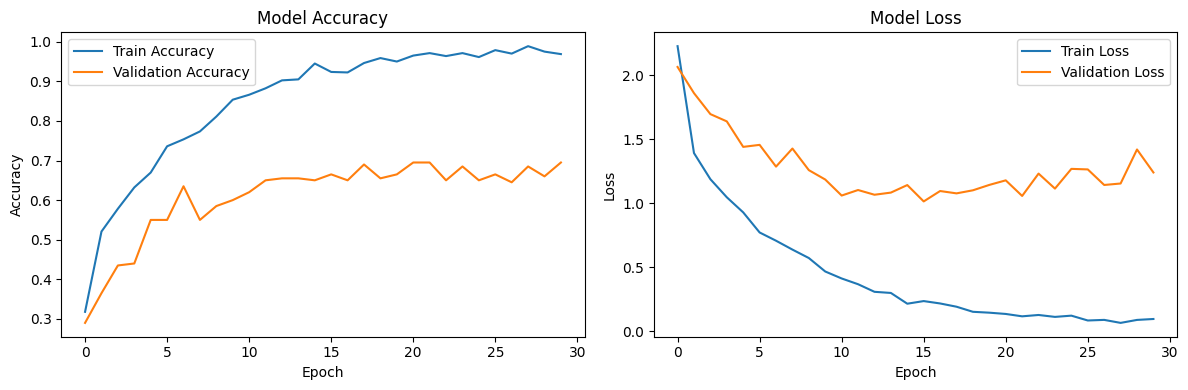

✅ Model saved as 'genre_cnn_model.h5'


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# -----------------------------------------------------
# ✅ STEP 1: Load your data (Replace with actual values)
# -----------------------------------------------------

# X = np.random.rand(1000, 40)      # REMOVE if using real data
# y = np.random.randint(0, 10, 1000)  # REMOVE if using real data

X = np.array(X)
y = np.array(y)

# -----------------------------------------------------
# ✅ STEP 2: Fix corrupted one-hot encoded y
# -----------------------------------------------------

# Keep undoing to_categorical until y is 1D
while len(y.shape) > 1 and y.shape[-1] == 10:
    y = np.argmax(y, axis=-1)

# Now correctly apply one-hot encoding
y = to_categorical(y, num_classes=10)

print("✅ y shape after cleaning and one-hot:", y.shape)  # should be (samples, 10)

# -----------------------------------------------------
# ✅ STEP 3: Reshape X for CNN input
# -----------------------------------------------------

if len(X.shape) == 2:
    X = X.reshape(X.shape[0], X.shape[1], 1)

print("✅ X shape after reshape:", X.shape)  # should be (samples, 40, 1)

# -----------------------------------------------------
# ✅ STEP 4: Train-Test Split
# -----------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# -----------------------------------------------------
# ✅ STEP 5: Build the CNN model
# -----------------------------------------------------

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # 10 genres

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -----------------------------------------------------
# ✅ STEP 6: Train the model
# -----------------------------------------------------

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# -----------------------------------------------------
# ✅ STEP 7: Evaluate model
# -----------------------------------------------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

# -----------------------------------------------------
# ✅ STEP 8: Plot accuracy and loss
# -----------------------------------------------------

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history.get('accuracy', []), label='Train Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history.get('loss', []), label='Train Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# ✅ STEP 9: Save the model
# -----------------------------------------------------

model.save("genre_cnn_model.h5")
print("✅ Model saved as 'genre_cnn_model.h5'")


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# -----------------------------------------------------
# ✅ STEP 1: Load or prepare your dataset (X and y)
# -----------------------------------------------------

# Example: Replace with your actual MFCC data and labels
# X = np.random.rand(1000, 40)
# y = np.random.randint(0, 10, 1000)

X = np.array(X)
y = np.array(y)

# -----------------------------------------------------
# ✅ STEP 2: Clean y if one-hot encoded multiple times
# -----------------------------------------------------

while len(y.shape) > 1 and y.shape[-1] == 10:
    y = np.argmax(y, axis=-1)

y = to_categorical(y, num_classes=10)
print("✅ y shape after one-hot:", y.shape)  # (samples, 10)

# -----------------------------------------------------
# ✅ STEP 3: Reshape X for CNN
# -----------------------------------------------------

if len(X.shape) == 2:
    X = X.reshape(X.shape[0], X.shape[1], 1)

print("✅ X shape:", X.shape)  # (samples, 40, 1)

# -----------------------------------------------------
# ✅ STEP 4: 80/20 Train-Validation Split
# -----------------------------------------------------

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

# -----------------------------------------------------
# ✅ STEP 5: Build the CNN model
# -----------------------------------------------------

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -----------------------------------------------------
# ✅ STEP 6: Train the model with validation
# -----------------------------------------------------

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# -----------------------------------------------------
# ✅ STEP 7: Evaluate model
# -----------------------------------------------------

loss, accuracy = model.evaluate(X_val, y_val)
print(f"\n🎯 Validation Accuracy: {accuracy * 100:.2f}%")

# -----------------------------------------------------
# ✅ STEP 8: Plot accuracy and loss graphs
# -----------------------------------------------------

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# ✅ STEP 9: Save the model
# -----------------------------------------------------

model.save("genre_cnn_model.h5")
print("✅ Model saved as 'genre_cnn_model.h5'")


✅ y shape after one-hot: (999, 10)
✅ X shape: (999, 40, 1)
X_train: (799, 40, 1)
y_train: (799, 10)
X_val: (200, 40, 1)
y_val: (200, 10)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30


KeyboardInterrupt: 

✅ y shape after one-hot encoding: (999, 10)
✅ X shape after reshape: (999, 40, 1)
✅ Data split done:
X_train: (799, 40, 1)
y_train: (799, 10)
X_val: (200, 40, 1)
y_val: (200, 10)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 38, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,218 (618.04 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3279 - loss: 2.1039 - val_accuracy: 0.1500 - val_loss: 2.1649
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5031 - loss: 1.3835 - val_accuracy: 0.2750 - val_loss: 2.0391
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6058 - loss: 1.1624 - val_accuracy: 0.3500 - val_loss: 1.7596
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6696 - loss: 0.9328 - val_accuracy: 0.4500 - val_loss: 1.6649
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7547 - loss: 0.7878 - val_accuracy: 0.4950 - val_loss: 1.4545
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7497 - loss: 0.7163 - val_accuracy: 0.6350 - val_loss: 1.2373
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7985 - loss: 0.6151 - val_accuracy: 0.5700 - val_loss: 1.2638
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7822 - loss: 0.6052 - val_accuracy: 0.6100 - val_loss

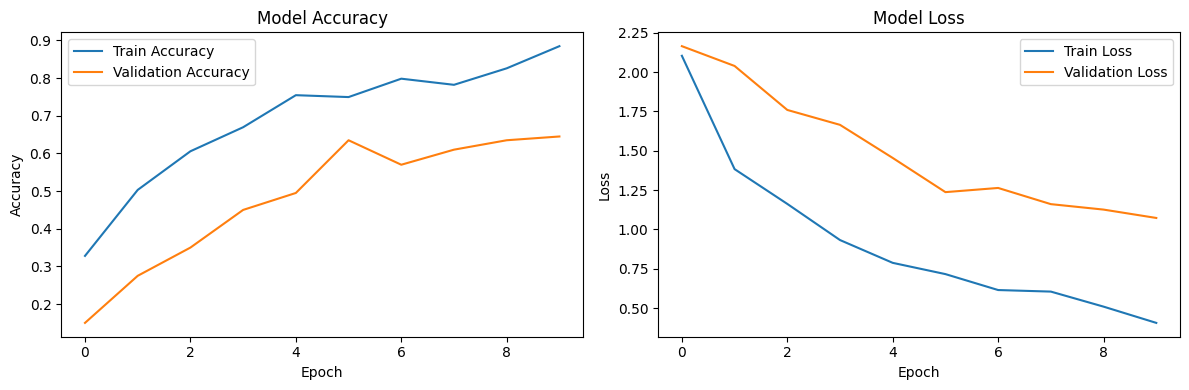

✅ Model saved as 'genre_cnn_model.h5'


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------------------
# ✅ STEP 1: Load or prepare X and y
# ---------------------------------------

# Use your actual data here
# Example dummy data (REMOVE if using real MFCCs)
# X = np.random.rand(1000, 40)
# y = np.random.randint(0, 10, 1000)

X = np.array(X)
y = np.array(y)

# ---------------------------------------
# ✅ STEP 2: Clean y if over-encoded
# ---------------------------------------

while len(y.shape) > 1 and y.shape[-1] == 10:
    y = np.argmax(y, axis=-1)

y = to_categorical(y, num_classes=10)
print("✅ y shape after one-hot encoding:", y.shape)

# ---------------------------------------
# ✅ STEP 3: Reshape X for CNN
# ---------------------------------------

if len(X.shape) == 2:
    X = X.reshape(X.shape[0], X.shape[1], 1)
print("✅ X shape after reshape:", X.shape)

# ---------------------------------------
# ✅ STEP 4: 80/20 Split
# ---------------------------------------

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("✅ Data split done:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

# ---------------------------------------
# ✅ STEP 5: Build CNN Model
# ---------------------------------------

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ---------------------------------------
# ✅ STEP 6: Train with Early Stopping
# ---------------------------------------

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=10,              # 👈 change to 30 later if needed
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

# ---------------------------------------
# ✅ STEP 7: Evaluate Model
# ---------------------------------------

loss, accuracy = model.evaluate(X_val, y_val)
print(f"\n🎯 Validation Accuracy: {accuracy * 100:.2f}%")

# ---------------------------------------
# ✅ STEP 8: Plot Accuracy & Loss
# ---------------------------------------

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------------------
# ✅ STEP 9: Save the Model
# ---------------------------------------

model.save("genre_cnn_model.h5")
print("✅ Model saved as 'genre_cnn_model.h5'")


In [5]:
import numpy as np
import librosa
from tensorflow.keras.models import load_model
import os

# Load the trained CNN model
model = load_model("genre_cnn_model.h5")

# Define the genre labels (same order used during training)
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop',
          'jazz', 'metal', 'pop', 'reggae', 'rock']

# Function to extract MFCC features from audio
def extract_mfcc(file_path="C:/Users/J.TINCKY PRIYA/Downloads/Data (1)/images_original/rock/rock00027.png", max_pad_len=174):
    y, sr = librosa.load("C:/Users/J.TINCKY PRIYA/Downloads/Data (1)/images_original/rock/rock00027.png", duration=30)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    # Padding if MFCC shape is short
    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]

    mfcc = np.mean(mfcc.T, axis=0)
    return mfcc.reshape(1, 40, 1)

# ------------------------------------------
# MAIN SCRIPT: Upload + Predict
# ------------------------------------------

file_path = input("📂 Enter path to your audio (.wav) file: ")

if not os.path.exists(file_path):
    print("❌ File not found. Please check the path.")
else:
    try:
        features = extract_mfcc(file_path)
        prediction = model.predict(features)
        predicted_index = np.argmax(prediction)
        predicted_genre = GENRES[predicted_index]

        print(f"\n🎵 Predicted Genre: {predicted_genre}")
    except Exception as e:
        print("❌ Error during prediction:", e)


❌ File not found. Please check the path.


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# ---------------------------------------------
# ✅ STEP 1: Set paths and parameters
# ---------------------------------------------
DATASET_PATH = r"C:\Users\J.TINCKY PRIYA\Downloads\Data (1)\images_original"
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10  # You can increase for better accuracy

# ---------------------------------------------
# ✅ STEP 2: Load dataset using ImageDataGenerator
# ---------------------------------------------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# ---------------------------------------------
# ✅ STEP 3: Build CNN Model
# ---------------------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ---------------------------------------------
# ✅ STEP 4: Train the Model
# ---------------------------------------------
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

# ---------------------------------------------
# ✅ STEP 5: Save the model
# ---------------------------------------------
model.save("genre_image_cnn_model.h5")
print("✅ Model saved as genre_image_cnn_model.h5")


Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


c:\Users\J.TINCKY PRIYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,994 (28.21 MB)

 Trainable params: 7,393,802 (28.21 MB)

 Non-trainable params: 192 (768.00 B)

c:\Users\J.TINCKY PRIYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 523ms/step - accuracy: 0.1800 - loss: 11.3557 - val_accuracy: 0.0905 - val_loss: 2.7386
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.1850 - loss: 2.1666 - val_accuracy: 0.1005 - val_loss: 2.6566
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.1775 - loss: 2.1340 - val_accuracy: 0.1005 - val_loss: 3.6306
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.1713 - loss: 2.1440 - val_accuracy: 0.1005 - val_loss: 4.1741
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.1825 - loss: 2.1615 - val_accuracy: 0.1005 - val_loss: 6.2024
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.1813 - loss: 2.1306 - val_accuracy: 0.1005 - val_loss: 8.0554
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.1700 - loss: 2.1318 - val_accuracy: 0.1005 - val_loss: 10.0590
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.1650 - loss: 2.1567 - val_accuracy:

✅ Model saved as genre_image_cnn_model.h5


In [7]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Constants
IMAGE_SIZE = (128, 128)
MODEL_PATH = "genre_image_cnn_model.h5"
TEST_IMAGE = r"C:\Users\J.TINCKY PRIYA\Downloads\Data (1)\images_original\rock\rock00027.png"

# Load model
model = load_model(MODEL_PATH)

# Load and preprocess image
img = load_img(TEST_IMAGE, target_size=IMAGE_SIZE)
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Get class labels from training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rebuild data generator to get class labels
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    r"C:\Users\J.TINCKY PRIYA\Downloads\Data (1)\images_original",
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

class_labels = list(train_data.class_indices.keys())

# Print result
print(f"🎵 Predicted Genre: {class_labels[predicted_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Found 800 images belonging to 10 classes.
🎵 Predicted Genre: metal


Found 800 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


c:\Users\J.TINCKY PRIYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


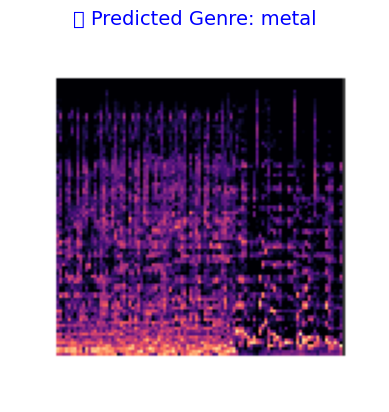

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------------------
# ✅ Configuration
# -------------------------------
IMAGE_SIZE = (128, 128)
MODEL_PATH = "genre_image_cnn_model.h5"
IMAGE_PATH = r"C:\Users\J.TINCKY PRIYA\Downloads\Data (1)\images_original\rock\rock00027.png"
DATASET_PATH = r"C:\Users\J.TINCKY PRIYA\Downloads\Data (1)\images_original"

# -------------------------------
# ✅ Load Trained Model
# -------------------------------
model = load_model(MODEL_PATH)

# -------------------------------
# ✅ Load and Preprocess Image
# -------------------------------
img = load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# -------------------------------
# ✅ Rebuild class labels from training
# -------------------------------
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
class_labels = list(train_data.class_indices.keys())

# -------------------------------
# ✅ Predict Genre
# -------------------------------
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_genre = class_labels[predicted_index]

# -------------------------------
# ✅ Show Image + Prediction
# -------------------------------
plt.imshow(img)
plt.axis('off')
plt.title(f"🎵 Predicted Genre: {predicted_genre}", fontsize=14, color='blue')
plt.show()
